In [1]:
import os 
import sys
sys.path.append(os.path.expanduser('~/code/loggingbot'))
from loggingbot import TelegramBotHandler

Telegram bot token (take it from [@botfather](https://telegram.me/botfather) ) and list of user ids where to send the messages are defined below. 

Note that this users should first start conversation the the bot (by telegram policy bots cannot send messages to unknown users). You can get particular user id by sending a message to bot and the check the updates from HTTP API like this `https://api.telegram.org/botXXXXXXXXX:XXXXXXXXXXXXX_XXXXXXXXXXXXXXXXXXXXX/getUpdates`.

In [2]:
token = 'XXXXXXXXX:XXXXXXXXXXXXX_XXXXXXXXXXXXXXXXXXXXX'
user_list = ['YYYYYYYYY']

Let's set logging level to `INFO` for root logger. Then create a new log event handler `TelegramBotHandler` and attach it to root logger.

In [3]:
import logging
logging.root.setLevel(logging.INFO)
tbh = TelegramBotHandler(token, user_list)
logging.root.addHandler(tbh)

As usual let's define some custom logger named `myapp`

In [4]:
logger = logging.getLogger('myapp')

Everything is setup! Let's just use it! In order to send the message to bot you should provide `extra` dictionary argument into logging functions. You should define `bot` key to `True`.

In [5]:
logger.info('My Application is launched', extra={'bot': True})

INFO:myapp:My Application is launched


In [6]:
try:
    x = 1 / 0
except Exception as e:
    logger.error("Huston, we've got a problem: %s", str(e), extra={'bot': True})

ERROR:myapp:Huston, we've got a problem: integer division or modulo by zero


By the way, you can skip message to be sent to bot by avoiding `bot` key in `extra` dictionary.

In [7]:
logger.info('This message will not be sent to bot')

INFO:myapp:This message will not be sent to bot


The nice thing that you can send to chat not only text but text along with multimedia: **images, files and even matplotlib's figures**!

INFO:myapp:Sending an image..


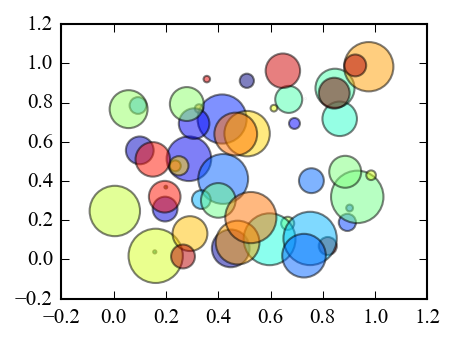

In [8]:
# the demo taken from http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

logger.info('Sending an image..', extra={'bot': True, 'figure': plt.gcf()})

The images or files can be sent by providing its path or file object:

In [9]:
with open(os.path.expanduser('~/Downloads/kittens.jpg')) as fin:
    logger.info('Everyone loves kittens!', extra={'bot': True, 'image': fin})

INFO:myapp:Everyone loves kittens!


In [10]:
logger.fatal('Catch the dump!', extra={'bot': True, 'file': '~/coredump.txt'})

CRITICAL:myapp:Catch the dump!
